In [1]:
%matplotlib inline
from sys import path
path.append("/Users/yangjunjie/work/bs-uhf/src/")

import numpy
import scipy
from numpy import load
import matplotlib as mpl
from matplotlib import pyplot as plt

from plot_utils import get_plot_data
from plot_utils import get_plot_style
from plot_utils import plot_data

Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_ucisd_1
Reading data from:  ene_noci_ucisd_2
Reading data from:  ene_noci_uhf
Reading data from:  ene_noci_ump2_1
Reading data from:  ene_noci_ump2_2
Reading data from:  ene_nuc
Reading data from:  ene_rcisd
Reading data from:  ene_rhf
Reading data from:  ene_rmp2
Reading data from:  ene_ucisd
Reading data from:  ene_uhf
Reading data from:  ene_ump2
Reading data from:  r
Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_ucisd_1
Reading data from:  ene_noci_ucisd_2
Reading data from:  ene_noci_uhf
Reading data from:  ene_no

(-0.01, 0.1)

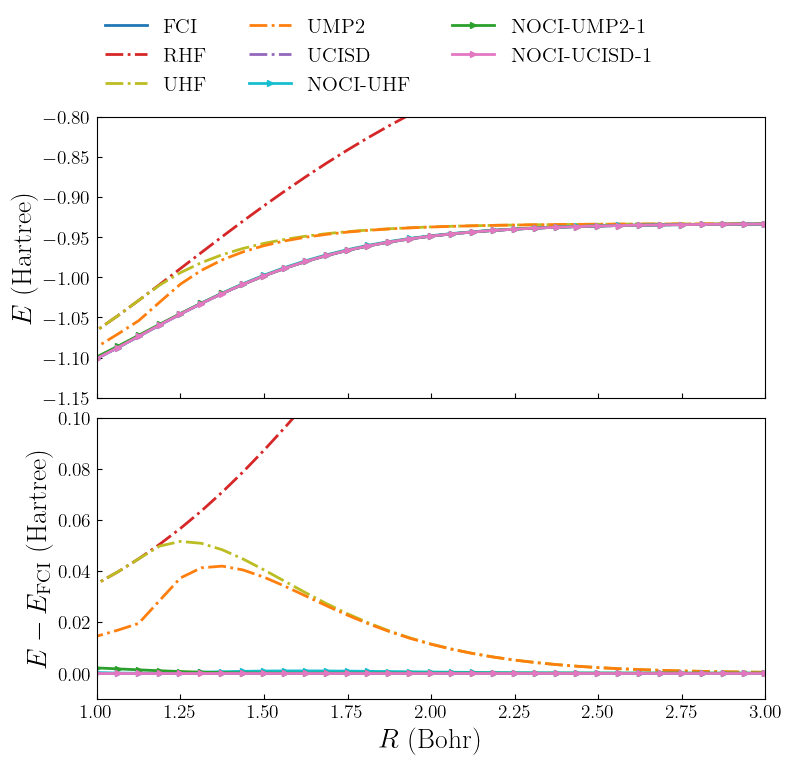

In [2]:
label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_1")
label_list.append("ene_noci_ucisd_1")

data_dict  = get_plot_data("../data/h2-sto-3g.h5")
style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.0, 3.0)
axs[0].set_ylim(-1.15, -0.8)
axs[1].set_ylim(-0.01, 0.1)

Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_ucisd_1
Reading data from:  ene_noci_ucisd_2
Reading data from:  ene_noci_uhf
Reading data from:  ene_noci_ump2_1
Reading data from:  ene_noci_ump2_2
Reading data from:  ene_nuc
Reading data from:  ene_rcisd
Reading data from:  ene_rhf
Reading data from:  ene_rmp2
Reading data from:  ene_ucisd
Reading data from:  ene_uhf
Reading data from:  ene_ump2
Reading data from:  r
Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_ucisd_1
Reading data from:  ene_noci_ucisd_2
Reading data from:  ene_noci_uhf
Reading data from:  ene_no

(-0.01, 0.1)

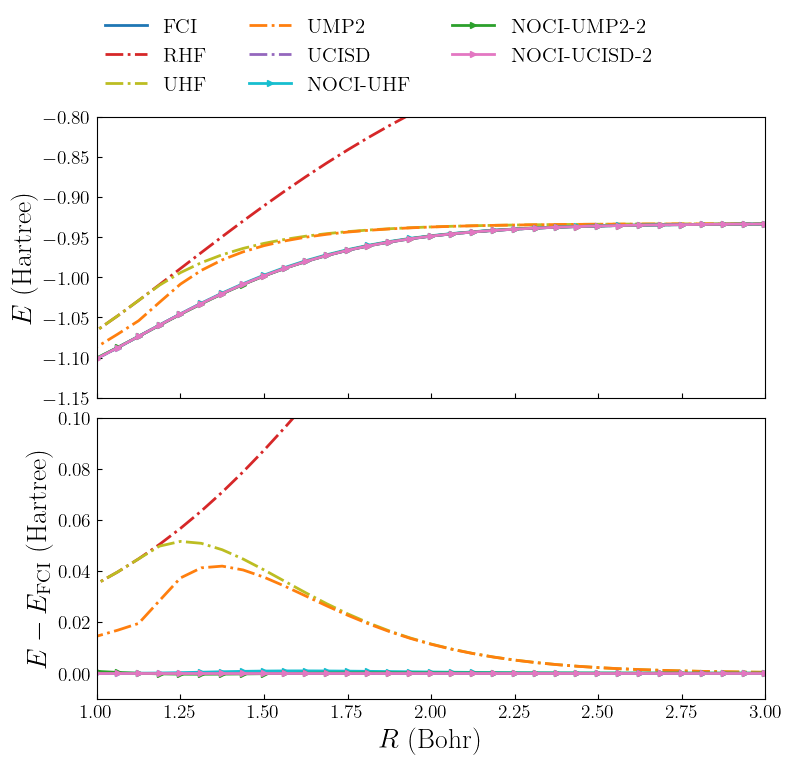

In [3]:
label_list = []
label_list.append("ene_fci")
label_list.append("ene_rhf")
label_list.append("ene_uhf")
label_list.append("ene_ump2")
label_list.append("ene_ucisd")
label_list.append("ene_noci_uhf")
label_list.append("ene_noci_ump2_2")
label_list.append("ene_noci_ucisd_2")
style_dict = get_plot_style(label_list)

data_dict  = get_plot_data("../data/h2-sto-3g.h5")
style_dict = get_plot_style(label_list)
fig, axs   = plot_data(data_dict, style_dict, label_list)
axs[0].set_xlim(1.0, 3.0)
axs[0].set_ylim(-1.15, -0.8)
axs[1].set_ylim(-0.01, 0.1)

Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_uhf
Reading data from:  ene_noci_ump2_1
Reading data from:  ene_noci_ump2_2
Reading data from:  ene_nuc
Reading data from:  ene_rcisd
Reading data from:  ene_rhf
Reading data from:  ene_rmp2
Reading data from:  ene_ucisd
Reading data from:  ene_uhf
Reading data from:  ene_ump2
Reading data from:  r
Reading data from:  ene_bs_ucisd_0
Reading data from:  ene_bs_ucisd_1
Reading data from:  ene_bs_uhf_0
Reading data from:  ene_bs_uhf_1
Reading data from:  ene_bs_ump2_0
Reading data from:  ene_bs_ump2_1
Reading data from:  ene_fci
Reading data from:  ene_noci_uhf
Reading data from:  ene_noci_ump2_1
Reading data from:  ene_noci_ump2_2
Reading data from:  ene_nuc
Reading data from:  ene_rcisd
Reading data from:  ene_rhf
Reading data fro

KeyError: 's2_uhf'

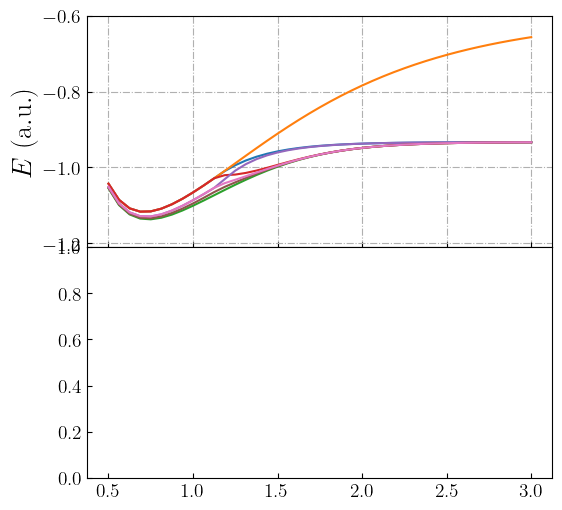

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(6, 6), sharex=True)
ax = axs[0]
data_dict = get_plot_data("../data/h2-sto-3g-scf.h5")
bond_length_list = data_dict["ene_uhf"][:, 0]
ene_uhf_list = data_dict["ene_uhf"][:, 1]
ene_rhf_list = data_dict["ene_rhf"][:, 1]
ene_noci_uhf_list = data_dict["ene_noci_uhf"][:, 1]
ene_fci_list = data_dict["ene_fci"][:, 1]
ene_noci_ump2_list_1 = data_dict["ene_noci_ump2_1"][:, 1]
ene_noci_ump2_list_2 = data_dict["ene_noci_ump2_2"][:, 1]
ene_ump2_list = data_dict["ene_ump2"][:, 1]
ene_nuc_list = data_dict["ene_nuc"][:, 1]
ax.plot(bond_length_list, [ene_uhf + ene_nuc for ene_uhf, ene_nuc in zip(ene_uhf_list, ene_nuc_list)], label="UHF")
ax.plot(bond_length_list, [ene_rhf + ene_nuc for ene_rhf, ene_nuc in zip(ene_rhf_list, ene_nuc_list)], label="RHF")
ax.plot(bond_length_list, [ene_fci + ene_nuc for ene_fci, ene_nuc in zip(ene_fci_list, ene_nuc_list)], label="FCI")
ax.plot(bond_length_list, [ene_noci_uhf + ene_nuc for ene_noci_uhf, ene_nuc in zip(ene_noci_uhf_list, ene_nuc_list)], label="NOCI-UHF")
ax.plot(bond_length_list, [ene_ump2 + ene_nuc for ene_ump2, ene_nuc in zip(ene_ump2_list, ene_nuc_list)], label="UMP2")
ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_1, ene_nuc_list)], label="NOCI-UMP2-1")
ax.plot(bond_length_list, [ene_noci_ump2 + ene_nuc for ene_noci_ump2, ene_nuc in zip(ene_noci_ump2_list_2, ene_nuc_list)], label="NOCI-UMP2-2")
ax.set_ylim(-1.21, -0.6)
# # ax.plot(bond_length_list, [ene_rhf_t + ene_nuc for ene_rhf_t, ene_nuc in zip(ene_rhf_t_list, ene_nuc_list)], label="RHF")
# ax.plot(bond_length_list, [ene_fci_s + ene_nuc for ene_fci_s, ene_nuc in zip(ene_fci_s_list, ene_nuc_list)], label=r"FCI-S$_0$")
# ax.plot(bond_length_list, [ene_fci_t + ene_nuc for ene_fci_t, ene_nuc in zip(ene_fci_t_list, ene_nuc_list)], label=r"FCI-T$_1$")
ax.set_ylabel(r"$E$ ($\mathrm{a.u.}$)")
# ax.legend(
#     loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
#     edgecolor='silver', frameon=False, fontsize=15, ncol=2
#     )
ax.grid(True, linestyle='-.')

ax = axs[1]
bond_length_list = data_dict["ene_uhf"][:, 0]
s2_uhf_list = data_dict["s2_uhf"][:, 1]
# s2_rhf_list = data_dict["s2_rhf_s"][:, 1]
# ax.plot(bond_length_list, s2_uhf_list, label="UHF")
# ax.plot(bond_length_list, s2_rhf_s_list, label="RHF")
# # ax.plot(bond_length_list, s2_rhf_t_list, label="RHF")
# ax.plot(bond_length_list, s2_fci_s_list, label="FCI")
# ax.plot(bond_length_list, s2_fci_t_list, label="FCI")

ax.set_xlim(0.49, 3.0)
ax.set_ylim(-0.04, 2.04)
ax.grid(True, linestyle='-.')

ax.set_ylabel(r"$\langle S^2 \rangle$")
ax.set_xlabel(r"$R$ ($\mathrm{\AA}$)")
fig.tight_layout(w_pad=0.4, h_pad=0.4)
fig.savefig("/Users/yangjunjie/Downloads/h2-bs-uhf-1.png", dpi=600)